In [1]:
import pickle as pkl
with open("../../wheelway/data/obstruction_spots_gt_1.pkl", 'rb') as pklfile:
    obstruction_spots_gt_1 = pkl.load(pklfile)
    
with open("../../wheelway/data/obstruction_spots_gt_2.pkl", 'rb') as pklfile:
    obstruction_spots_gt_2 = pkl.load(pklfile)
    
with open("../../wheelway/data/surface_spots_gt_1.pkl", 'rb') as pklfile:
    surface_spots_gt_1 = pkl.load(pklfile)
    
with open("../../wheelway/data/surface_spots_gt_2.pkl", 'rb') as pklfile:
    surface_spots_gt_2 = pkl.load(pklfile)


In [8]:
import pandas as pd
df_o_1 = pd.DataFrame(obstruction_spots_gt_1).drop(columns=['predictions'])
df_o_2 = pd.DataFrame(obstruction_spots_gt_2).drop(columns=['predictions'])
df_s_1 = pd.DataFrame(surface_spots_gt_1).drop(columns=['predictions'])
df_s_2 = pd.DataFrame(surface_spots_gt_2).drop(columns=['predictions'])


In [12]:
df_o_1['point'] = list(zip(df_o_1['lng'], df_o_1['lat']))
df_o_2['point'] = list(zip(df_o_1['lng'], df_o_2['lat']))
df_s_1['point'] = list(zip(df_o_1['lng'], df_s_1['lat']))
df_s_2['point'] = list(zip(df_o_1['lng'], df_s_2['lat']))

In [14]:
df_o_1.drop(inplace=True, columns=['lat','lng'])
df_o_2.drop(inplace=True, columns=['lat','lng'])
df_s_1.drop(inplace=True, columns=['lat','lng'])
df_s_2.drop(inplace=True, columns=['lat','lng'])

In [15]:
all_pts_1 = pd.concat([df_o_1, df_s_1])

In [203]:
all_pts_2 = pd.concat([df_o_2, df_s_2])

In [24]:
import geopandas as gpd
from shapely.ops import unary_union
import shapely
streets = gpd.read_file("../data/brighton/brighton_streets.shp")
all_streets = streets.geometry

In [204]:
all_pts_2

,direction,obstructions,surface,point
0,right,6,0,"(-71.16516192431138, 42.351975036388254)"
1,left,4,0,"(-71.15930721062891, 42.3626816202579)"
2,right,3,0,"(-71.14456049995755, 42.360911077723514)"
3,right,3,0,"(-71.15498188145479, 42.35410175554013)"
4,left,4,0,"(-71.14750215219456, 42.338413918985566)"
5,right,7,0,"(-71.14723244276809, 42.34029872650075)"
6,right,3,0,"(-71.14879237233619, 42.35849160244446)"
7,right,3,0,"(-71.15488964345329, 42.353038029781416)"
8,right,3,0,"(-71.1538347757243, 42.354181845354574)"
9,right,3,0,"(-71.14679231623799, 42.33961625124301)"


In [211]:
import math
def get_nearest_street(pt):
    pt = shapely.geometry.Point(pt)
    street = min(all_streets, key = lambda x : pt.distance(x))
    if type(street) == shapely.geometry.MultiLineString:
        streets = street.geoms
        street = min(streets, key = lambda x : pt.distance(x))
    return street
    
def linestring_start(linestring):
    (l1,l2) = list(linestring.coords)[0]
    return (l1,l2)

def linestring_end(linestring):
    (l1,l2) = list(linestring.coords)[1]
    return (l1,l2)

def linestring_heading(linestring):
    
    # 0 is true north, 90 is east
    # so heading = 90 - usual_angle (in standard form)
    (l1,l2) = linestring_start(linestring)
    (m1,m2) = linestring_end(linestring)
    angle_deg = math.atan2(m2-l2, m1-l1) * 360 / (2 * math.pi)
    heading_deg = int((90 - angle_deg) % 360)
    return(heading_deg)

In [212]:
all_pts_1['street_heading'] = all_pts_1['point'].map(get_nearest_street).map(linestring_heading)
all_pts_2['street_heading'] = all_pts_2['point'].map(get_nearest_street).map(linestring_heading)

In [188]:
from tqdm.autonotebook import tqdm
from shapely.geometry import Point, LineString
def polar_line(point, direction, length = .001):
    p0 = shapely.geometry.Point(point)
    # heading = 90 - standard angle
    #so standard angle = 90 - heading
    angle = math.radians(90 - direction)
    xoff = length * math.cos(angle)
    yoff = length * math.sin(angle)
    p1 = shapely.affinity.translate(p0, xoff=xoff, yoff=yoff)
    return LineString([p0, p1])

def look_at_sidewalks(sidewalks, point, direction):
    point = Point(point)
    look_line = polar_line(point, direction)
    #intersections = look_line.intersection(all_streets_geo)
    # not exactly right but...
    query = tree.query(look_line) # some lines
        
    #intersected = [i for i, row in sidewalks.iterrows() if row['geometry'].intersects(look_line)]
    if query == []:
        return None
    else:
        nearest_line = min(query, key = lambda line : point.distance(line))
        nearest_line_id = id(nearest_line)
        return id_dict[nearest_line_id]

def obstruct_sidewalk(sidewalks, point, direction):
    def reverse_line(linestring):
        coord = linestring.coords[:].reverse()
        return LineString(coord)
    sidewalk_index = look_at_sidewalks(sidewalks, point, direction)
    if sidewalk_index is None:
        print(point, direction)
    else:
        u = sidewalks.iloc[sidewalk_index]['u']
        v = sidewalks.iloc[sidewalk_index]['v']
    
        other_index = sidewalks.index[(sidewalks['u'] == v) & (sidewalks['v'] == u)]
    
        other_index = other_index[0]
    
        sidewalks.iloc[sidewalk_index, sidewalks.columns.get_loc('obstructed')] = 1
        sidewalks.iloc[other_index, sidewalks.columns.get_loc('obstructed')] = 1
    
    
def obstruct_sidewalks(sidewalks, obs_df):
    for _, row in tqdm(obs_df.iterrows()):
        if row['direction'] == 'left':
            heading = (row['street_heading'] - 90) % 360
        elif row['direction'] == 'right':
            heading = (row['street_heading'] + 90) % 360
        obstruct_sidewalk(sidewalks, row['point'], heading)
        
    
    
    

In [217]:
gdf=gpd.read_file("../test/final.shp")

In [218]:
gdf['obstructed'] = 0

In [219]:
obstruct_sidewalks(gdf, all_pts_2)

(-71.15930721062891, 42.3626816202579) 183
(-71.14456049995755, 42.360911077723514) 275
(-71.1538347757243, 42.354181845354574) 20
(-71.1602331891275, 42.36064078961316) 177
(-71.16024772176007, 42.36341823631406) 177
(-71.15959669825926, 42.34516365629679) 224
(-71.16108563164596, 42.3458067461352) 178
(-71.1384128851695, 42.354094478429246) 100
(-71.14290608887161, 42.33914365345885) 44
(-71.15931768440927, 42.36162278077689) 172
(-71.1660375544119, 42.34677373283121) 270
(-71.13972686691486, 42.35427342254141) 281
(-71.14935569893545, 42.35825258467177) 165
(-71.1716383502274, 42.3570220609794) 180
(-71.15326321886974, 42.34267233010809) 20
(-71.14388499171707, 42.35403820244488) 16
(-71.15775428008843, 42.347763421738904) 288
(-71.14459650889678, 42.33606570257179) 30
(-71.15662070536386, 42.36233789796101) 172
(-71.16153133945454, 42.34070743876115) 272
(-71.14158936868043, 42.34078348576168) 131
(-71.14250435300329, 42.34886132152808) 17
(-71.1406372661191, 42.33978058299172) 131

(-71.16889584454393, 42.34483777413707) 104
(-71.13804219666088, 42.34685355884474) 26
(-71.13661625203477, 42.352205634037304) 100
(-71.14694889529045, 42.35035334247827) 189
(-71.1530744220296, 42.34207866095657) 20
(-71.1559081839309, 42.3537719017346) 270
(-71.1549752192529, 42.336938449235845) 143
(-71.16292894840922, 42.34204693760975) 182
(-71.16280284112118, 42.34267029554172) 128
(-71.16567512706966, 42.34736888164056) 17
(-71.14255972556424, 42.353048553340685) 194
(-71.14587013966633, 42.34783889970976) 292
(-71.1428891481938, 42.331370833214734) 166
(-71.15806734508321, 42.34483777413707) 235
(-71.17056365468841, 42.34196673036359) 204
(-71.14606441769274, 42.354215429172214) 14
(-71.13960776500522, 42.35271169505124) 189
(-71.15496570925771, 42.34832468521816) 113
(-71.14528054716237, 42.35214219869364) 118
(-71.15982336121917, 42.362411614560806) 352
(-71.15224676830903, 42.3430810188504) 174
(-71.14513745934227, 42.35032491354224) 298
(-71.13998845302254, 42.355239377860

(-71.14789669783755, 42.34731938310508) 28
(-71.15958622097432, 42.3474223329226) 16
(-71.16613930419464, 42.353593130915854) 10
(-71.14745205038625, 42.348357611373686) 112
(-71.16935253770595, 42.345336214462506) 104
(-71.17386557742634, 42.35916029564562) 180
(-71.16867604296459, 42.33999053621034) 340
(-71.13851196229312, 42.358472837961045) 7
(-71.17212795731675, 42.35998599390315) 358
(-71.14494879769555, 42.34731491896316) 241
(-71.14519377482091, 42.35989476772125) 198
(-71.16211977601162, 42.3453204058997) 124
(-71.14649893138755, 42.35616268445355) 286
(-71.16934524738375, 42.34346940463462) 284
(-71.17065370189547, 42.34211193121401) 24
(-71.14613077034956, 42.34787313318358) 292
(-71.13961490635424, 42.3406501502006) 142
(-71.15930798175617, 42.33640622737128) 143
(-71.15659929102118, 42.34596060134841) 272
(-71.16779118494793, 42.33987062363522) 160
(-71.14408683170961, 42.34002798129305) 191
(-71.13831373115485, 42.34083100242286) 141
(-71.16739026299796, 42.3441139128883

In [157]:
from shapely.strtree import STRtree

In [182]:
tree = STRtree(gdf[gdf['key'] == 0].geometry)


In [187]:
id_dict = {}
for i, ID in ids.iteritems():
    id_dict[ID] = i

{140575891702608: 0,
 140574819917072: 1,
 140574820012624: 2,
 140574817101584: 3,
 140574817101200: 4,
 140574817101328: 5,
 140574817101968: 6,
 140574817102608: 7,
 140574817609232: 8,
 140574817609296: 9,
 140574817609936: 10,
 140574817610576: 11,
 140574817611216: 12,
 140574817611664: 13,
 140574817104720: 14,
 140574817104400: 15,
 140574817104272: 16,
 140574817105616: 17,
 140574817107344: 18,
 140574817593232: 19,
 140574817591376: 20,
 140574817592336: 21,
 140574817595088: 22,
 140574817592016: 23,
 140574817611856: 24,
 140574817613648: 25,
 140574817615568: 26,
 140574817614352: 27,
 140574817615504: 28,
 140574817604240: 29,
 140574817605136: 30,
 140574817605456: 31,
 140574817606096: 32,
 140574817607120: 33,
 140574817575056: 34,
 140574820062416: 35,
 140574817577680: 36,
 140574817577872: 37,
 140574817578512: 38,
 140574817575376: 39,
 140574817588368: 40,
 140574817587344: 41,
 140574817589584: 42,
 140574817590224: 43,
 140574817588816: 44,
 140574817558928: 45

In [172]:
gdf

,angle_deg,angleclass,elevation_,elevatio_1,forward,key,length_m,osmid,street_id,u,v,geometry,obstructed
0,13.809844,4,47.928315,48.911538,1.0,0,4.000000,2147483647,8646793,0,6449,LINESTRING (-71.15143672527559 42.344421364134...,0
1,-13.809844,4,47.928315,48.911538,1.0,0,4.000000,2147483647,8646793,0,19868,LINESTRING (-71.15143672527559 42.344421364134...,0
2,81.845116,4,21.539268,16.772988,0.0,0,0.683001,2147483647,8641743,1,52793,LINESTRING (-71.16042541346407 42.347334334960...,0
3,0.000000,0,NaN,NaN,NaN,1,0.022127,6,0,1,2,LINESTRING (-71.16042541346407 42.347334334960...,0
4,0.000000,0,NaN,NaN,NaN,1,2.243520,66006,0,1,33002,LINESTRING (-71.16042541346407 42.347334334960...,0
5,1.375793,1,16.775068,16.871135,0.0,0,4.000000,2147483647,8641743,2,12662,LINESTRING (-71.16042566373275 42.347334408350...,0
6,0.000000,0,NaN,NaN,NaN,1,0.022127,6,0,2,1,LINESTRING (-71.16042566373275 42.347334408350...,0
7,0.000000,0,NaN,NaN,NaN,1,2.233820,99009,0,2,33002,LINESTRING (-71.16042566373275 42.347334408350...,0
8,46.115809,4,37.600250,41.759161,0.0,0,4.000000,2147483647,323905075,3,48890,LINESTRING (-71.15041626608377 42.336669744034...,0
9,-46.115809,4,37.600250,41.759161,0.0,0,4.000000,2147483647,323905075,3,42833,LINESTRING (-71.15041626608377 42.336669744034...,0


In [220]:
gdf.drop(inplace=True, columns=['elevation_', 'elevatio_1','forward'])
gdf.to_file("../test/obstructed.shp")

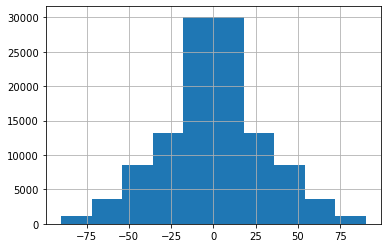

In [194]:
gdf[gdf['key'] == 0]['angle_deg'].hist()

In [198]:
len(gdf[gdf['obstructed'] == 1])/len(gdf)

0.043673448643886906

In [221]:
gdf['osmid'] = gdf.index

In [222]:
gdf.to_file("../test/obstructed.shp")